In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

df = pd.DataFrame({
    "Area": [2600, 3000, 3200,3600, 4000],
    "Price": [550000, 565000, 610000, 680000, 725000]
})

In [2]:
df

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


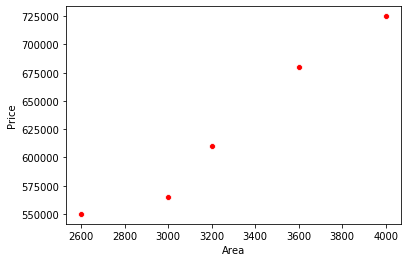

In [3]:
ax = sns.scatterplot(x= "Area", y= 'Price', data= df, color="red")


In [4]:
obj = linear_model.LinearRegression()

In [5]:
obj.fit(df[['Area']], df[['Price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
obj.predict([[3300]])

array([[628715.75342466]])

In [7]:
test = pd.DataFrame({'area': [3300, 3400,3500,3600]})
test

,area
0,3300
1,3400
2,3500
3,3600


In [8]:
test['price'] = obj.predict(test[['area']])
test

,area,price
0,3300,628715.753425
1,3400,642294.520548
2,3500,655873.287671
3,3600,669452.054795


In [9]:
test.to_csv("my first machine learing result.csv", index= False)

In [10]:
m = obj.coef_
m[0,0]

135.78767123287673

In [11]:
c = obj.intercept_


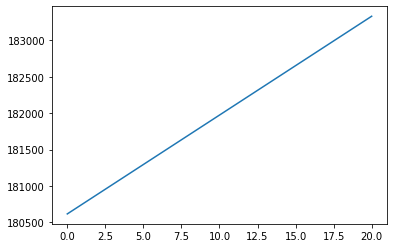

In [12]:
x = np.linspace(0,20, 50)
y = m[0,0]*x + c[0]

plt.plot(x,y)
plt.show()

In [13]:
df.Area

0    2600
1    3000
2    3200
3    3600
4    4000
Name: Area, dtype: int64

In [14]:
type(df['Area'])

pandas.core.series.Series

In [15]:
data = pd.DataFrame({
    'name': ['selim', 'rahim', 'karim'],
    'age': [19, np.nan, 45],
    'profession': ['student', 'sport', 'businessman']
})
data

,name,age,profession
0,selim,19.0,student
1,rahim,NaN,sport
2,karim,45.0,businessman


In [16]:
data.dtypes

name           object
age           float64
profession     object
dtype: object

In [17]:
#data['age'] = data['age'].fillna(data['age'].mean())
data['age'].fillna(data['age'].min(), inplace= True)

In [18]:
data

,name,age,profession
0,selim,19.0,student
1,rahim,19.0,sport
2,karim,45.0,businessman


In [19]:
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [20]:
df.iloc[:, [2]]

,age
0,20
1,15
2,18
3,30
4,8
5,8


In [21]:
df[['age']]

,age
0,20
1,15
2,18
3,30
4,8
5,8


In [22]:
df.columns

Index(['area', 'bedrooms', 'age', 'price'], dtype='object')

In [23]:
df.dtypes

area          int64
bedrooms    float64
age           int64
price         int64
dtype: object

In [24]:
import math
df['bedrooms'] = df['bedrooms'].fillna(math.floor(df['bedrooms'].median()))
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [25]:
reg_obj = linear_model.LinearRegression() 

In [48]:
model = reg_obj.fit(df[['area', 'bedrooms', 'age']], df['price'])

In [51]:
model.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [53]:
model.intercept_

221323.00186540408

In [49]:
y_pred = model.predict([[4000, 5, 8]])


In [50]:
y_pred

array([760663.42675457])

In [29]:
dff = pd.DataFrame({
    'name': ['selim', 'rahim', 'karim', 'selim', 'saiful'],
    'age': [12, 13,12, 14, 12],
    'movie': ['pk', 'dia', 'kgf', 'wanted','kgf'],
    'income': [10000, 20000, 20000, 12000, 12000]
})
dff

,name,age,movie,income
0,selim,12,pk,10000
1,rahim,13,dia,20000
2,karim,12,kgf,20000
3,selim,14,wanted,12000
4,saiful,12,kgf,12000


In [30]:
dff.columns

Index(['name', 'age', 'movie', 'income'], dtype='object')

In [31]:
for col in dff.columns:
    print(col)

name
age
movie
income


In [32]:
dff['name']

0     selim
1     rahim
2     karim
3     selim
4    saiful
Name: name, dtype: object

In [33]:
dff['name'].value_counts()

selim     2
saiful    1
karim     1
rahim     1
Name: name, dtype: int64

In [34]:
dff.name.sort_values(ascending= False)

3     selim
0     selim
4    saiful
1     rahim
2     karim
Name: name, dtype: object

In [35]:
dff['name'].unique()

array(['selim', 'rahim', 'karim', 'saiful'], dtype=object)

In [36]:
dff['income'].unique()

array([10000, 20000, 12000], dtype=int64)

In [37]:
for col in dff.columns:
    print(f'{col} have {len(dff[col].unique())} unique values')

name have 4 unique values
age have 3 unique values
movie have 4 unique values
income have 3 unique values


In [38]:
dff

,name,age,movie,income
0,selim,12,pk,10000
1,rahim,13,dia,20000
2,karim,12,kgf,20000
3,selim,14,wanted,12000
4,saiful,12,kgf,12000


In [39]:
ddff = dff.groupby(by='name')
ddff

In [40]:
ddff.get_group('selim')

,name,age,movie,income
0,selim,12,pk,10000
3,selim,14,wanted,12000


In [41]:
for val, name_df in ddff:
    #print(val)
    print(name_df)

    name  age movie  income
2  karim   12   kgf   20000
    name  age movie  income
1  rahim   13   dia   20000
     name  age movie  income
4  saiful   12   kgf   12000
    name  age   movie  income
0  selim   12      pk   10000
3  selim   14  wanted   12000


In [42]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [43]:
df1 = pd.DataFrame({
    'city': ['dhaka', 'brahmanbaria', 'cumilla'],
    'temp': [14, 34, 54],
    'humidity': [23, 45, 65]
})
df2 = pd.DataFrame({
    'city': ['dhaka', 'brahmanbaria', 'sylhet'], 
    'rain': [45, 34, 54],
    'sunny': [43, 65, 43],
    'pressur': [2,3,4]
})

df3 = pd.merge(df1, df2, on= "city", how= 'outer')
df3

,city,temp,humidity,rain,sunny,pressur
0,dhaka,14.0,23.0,45.0,43.0,2.0
1,brahmanbaria,34.0,45.0,34.0,65.0,3.0
2,cumilla,54.0,65.0,NaN,NaN,NaN
3,sylhet,NaN,NaN,54.0,43.0,4.0
